# C3S_422_Lot2 Plymouth Marine Laboratory: Marine, Coastal and Fisheries Sectoral Information Systems. #
## How to use the Climate Data Store to find, download and process data. ##

This tutorial will demonstrate how to use the Copernicus Climate Data Store (CDS) to search for Marine, Coastal and Fisheries data. It will show how to use the CDS API to download selected data and process within a Python Notebook.

Locate your dataset on the Copernicus Climate Data Store (CDS), https://cds-dev.copernicus-climate.eu.  
![CDS welcome](img/cds_1.png)

Click on "Datasets" to browse the data available in the CDS

![Datasets](img/cds_2.png)
Either browse the available datasets on the right of the window or enter some text to search for in the box on the left.  
For this example we will search for __"fish abundance"__.

![Search](img/cds_3.png)
The dataset we want should be the first one listed, **"Fish abundance and catch data for the European and Mediterranean sea shelf from 2006 to 2100 derived from climate projections"**

Click on the title to go to the Overview page for the data.
![Overview](img/cds_4.png)

Here, you can read a summary of the dataset so you can decide if it is useful.  
To choose which data to download, open the Download tab and select using the check boxes on the form.
![Download](img/cds_5.png)

Once you have selected enough options to allow the CDS to identify what needs to be downloaded, the button at the bottom right of the window will change to display a login prompt.
![Login](img/cds_6.png)

If you want to download the data via the browser then you must click the link and login. You will then be taken back to the download form where you can click to download the data.  
In our case we want to use the CDS API within this notebook so use the API link on the left.
![API](img/cds_7.png)

This will show the API snippet you need to include in your Python to perform the download.
![Snippet](img/cds_8.png)

We are going to be running this in an online notebook that already has the cdsapi package installed. If you want to use this on you own system then you will need to install it. Follow the link on the page (https://cds.climate.copernicus.eu/api-how-to) for instructions.

We are now ready to download the data into the notebook.

The API generally returns its data as a zip file. However if only one file is retrieved from the CDS then this will be returned in its native format. For this example we have selected 4 species of fish so a zip file will be returned.

An example snippet is shown below. You can replace it with your own snippet if you want to change the data downloaded.  


In [55]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'test-sis-operational-contract-c3s-442-lot2-pml-european-fisheries-fish-abundance',
    {
        'format':'zip',
        'model':'ss_dbem_polcoms',
        'variable':'species_catch',
        'experiment':'rcp4_5',
        'maximum_sustainable_yield':'0_6',
        'species':[
            'anchovie','herring','mackerel',
            'sardine'
        ]
    },
    'download.zip')

2019-06-12 13:13:34,201 INFO Sending request to https://cds-dev.copernicus-climate.eu/api/v2/resources/test-sis-operational-contract-c3s-442-lot2-pml-european-fisheries-fish-abundance
2019-06-12 13:13:34,634 INFO Request is completed
2019-06-12 13:13:34,634 INFO Downloading http://136.156.132.79/cache-compute-0003/cache/data2/dataset-test-sis-operational-contract-c3s-442-lot2-pml-european-fisheries-fish-abundance-73bf292d-dd04-43eb-bac7-75e40e49cc3d.zip to download.zip (3.1M)
2019-06-12 13:13:34,826 INFO Download rate 16.3M/s


Result(content_length=3267765,content_type=application/zip,location=http://136.156.132.79/cache-compute-0003/cache/data2/dataset-test-sis-operational-contract-c3s-442-lot2-pml-european-fisheries-fish-abundance-73bf292d-dd04-43eb-bac7-75e40e49cc3d.zip)

We now have a zip file in our directory. Let's see what is in it.

In [56]:
import zipfile
with zip.ZipFile('download.zip') as myzip:
    print(myzip.namelist())

['SS_DBEM_POLCOMS_fish_abundance-catch-rcp45-msy06-mackerel-v0.1.nc', 'SS_DBEM_POLCOMS_fish_abundance-catch-rcp45-msy06-anchovie-v0.1.nc', 'SS_DBEM_POLCOMS_fish_abundance-catch-rcp45-msy06-herring-v0.1.nc', 'SS_DBEM_POLCOMS_fish_abundance-catch-rcp45-msy06-sardine-v0.1.nc']


In [57]:
with zip.ZipFile('download.zip') as myzip:
    myzip.extract('SS_DBEM_POLCOMS_fish_abundance-catch-rcp45-msy06-herring-v0.1.nc')

We can now open the NetCDF using the xarray package.

In [58]:
import xarray as xr
xr_ensemble = xr.open_dataset('SS_DBEM_POLCOMS_fish_abundance-catch-rcp45-msy06-herring-v0.1.nc')

We are going to perform some simple subsetting and visualisation using xarray (http://xarray.pydata.org) and geoviews (http://geo.holoviews.org/).

In [59]:
import numpy as np
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
import cartopy.feature as cfeature
import holoviews as hv

hv.notebook_extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

If we inspect the xr_ensemble object we see it is an xarray dataset which includes all the metadata contained in the download NetCDF. This make our job very easy as xarray know which dimensions apply to the data.

In [60]:
xr_ensemble

<xarray.Dataset>
Dimensions:    (latitude: 107, longitude: 112, time: 93)
Coordinates:
  * latitude   (latitude) float32 11.25 11.75 12.25 12.75 ... 63.25 63.75 64.25
  * longitude  (longitude) float32 -19.25 -18.75 -18.25 ... 35.25 35.75 36.25
  * time       (time) datetime64[ns] 2006-01-01 2007-01-01 ... 2098-01-01
Data variables:
    catch      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:           CF-1.6
    id:                    CERES DBEM Results
    naming_authority:      pml.ac.uk
    Metadata_Conventions:  Unidata Dataset Discovery v1.0
    creator_name:          Ben Calton
    creator_email:         bac@pml.ac.uk
    creator_url:           https://www.pml.ac.uk
    author_name:           Sevrine Sailey
    author_email:          sesa@pml.ac.uk
    Reference:             William W. L. Cheung, Vicky W.Y. Lam and Daniel Pa...
    Website:               https://ceresproject.eu/
    Model:                 SS-DBEM - Size Spectre Dynamic Bioclimate Envelope.

We can now make some simple plots such as this time series plot of the mean catch for the entire area.

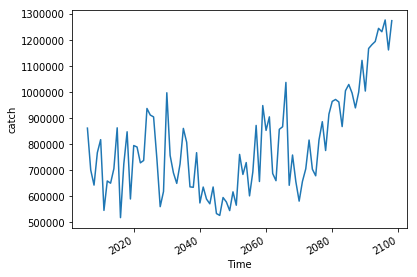

In [61]:
xr_ensemble.catch.mean(dim=('longitude', 'latitude')).plot()

If we use the Geoviews package then we can make use of its knowledge of the metadata to easily produce maps of the entire dataset.

In [62]:
hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d'
%opts Image {+framewise} [colorbar=True, fig_size=200, ] Curve [xrotation=60]
%output max_frames=100000

We can also add land to the maps we produce.

In [63]:
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black',
                                        facecolor='#C0E8C0')

To plot a map we need to tell Geoviews what dimensions we are interested in. Once we have done that it works out the best way to display the map.  
In this case we have 3 dimensions; time, longitude and latitude, and we want to plot the herring catch. 

In [64]:
kdims = ['time', 'longitude', 'latitude']
vdims = hv.Dimension(('catch','Projected catch'), unit='herring')

Create a Geoviews dataset, changing the scale for the catch to be between 500,000 and 1,000,000. 


In [65]:
gvds = gv.Dataset(xr_ensemble, kdims=kdims, vdims=vdims, crs=crs.PlateCarree()).redim.range(catch=(500000,2000000))

We can now create an image specifying we want it to use latitude and longitude. Geoviews will automatically create a time slider to allow us to move through the other dimension.

In [66]:
gvds.to(gv.Image, ['longitude', 'latitude']).options(cmap='plasma', fig_size=200) * gv.Feature(land_10m)

:HoloMap   [time]
   :Overlay
      .Image.I   :Image   [longitude,latitude]   (catch)
      .Feature.I :Feature   [Longitude,Latitude]

If we want to look at a spatial subset of the data we can get this by using the 'sel' function. We can also apply this when we create the plot to limit the temporal range.

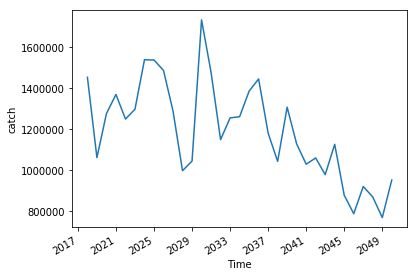

In [67]:
uk = xr_ensemble.sel(latitude=slice(48.4,63.5), longitude=slice(-10.8,3.2))
uk.catch.mean(dim=('longitude', 'latitude')).sel(time=slice('2018-01-01','2050-01-01')).plot()

We can now display the subset on a map with a scale better suited to the region.

In [ ]:
ukds = gv.Dataset(uk, kdims=kdims, vdims=vdims, crs=crs.PlateCarree()).redim.range(catch=(800000,1700000))
ukds.to(gv.Image, ['longitude', 'latitude']).options(cmap='plasma', fig_size=200) * gv.Feature(land_10m)

For more information check out http://geo.holoviews.org/, http://xarray.pydata.org and https://cds.copernicus-climate.eu.